In [1]:
import pandas as pd 
import numpy as np 
pd.set_option('display.max_columns', None) 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

In [2]:
df_ = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/ready12_24_train.csv')

In [3]:
df2 = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/train_4_model.csv')

In [4]:
df2.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'y_target', 'delta_first_reg',
       'interaction_regreister_delta', 'delta_first_start', 'delta_reg_end',
       'Camp_Length', 'Second', 'Third', '1036', '1216', '1217', '1352',
       '1704', '1729', '2517', '2662', '23384', 'B', 'C', 'D', 'E', 'F', 'G',
       '2100', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0',
       '11.0', '12.0', '13.0', '14.0', '9999.0', '1', '2', '3', '4'],
      dtype='object')

In [5]:
df2_ = df2.drop(['delta_first_reg','interaction_regreister_delta', 'delta_first_start', 'delta_reg_end',
       'Camp_Length', 'Second', 'B', 'C', 'D', 'E', 'F', 'G', '1', '2', '3', '4'], axis=1)

In [6]:
df2_

,Var1,Var2,Var3,Var4,Var5,y_target,Third,1036,1216,1217,1352,1704,1729,2517,2662,23384,2100,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,9999.0
0,0.420086,-0.063285,-0.019631,-0.11236,1.442928,1.0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.420086,-0.063285,-0.019631,-0.11236,1.442928,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
75274,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613,1.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
75275,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613,1.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
75276,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
vals = df2_['Var5'].values
d_vals = {}
for i in vals:
    if i not in d_vals:
        d_vals[i]=1
    else:
        d_vals[i]+=1
print(len(d_vals))

30


In [8]:
# Var1={0,300,20}, 9999.0, 23384,Var5 = {0,35,6}

(array([2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.]),
 array([-0.20461305,  0.64661648,  1.49784601,  2.34907555,  3.20030508,
         4.05153461,  4.90276414,  5.75399367,  6.60522321,  7.45645274,
         8.30768227,  9.1589118 , 10.01014133, 10.86137087, 11.7126004 ,
        12.56382993, 13.41505946, 14.26628899, 15.11751852, 15.96874806,
        16.81997759, 17.67120712, 18.52243665, 19.37366618, 20.22489572,
        21.07612525, 21.92735478, 22.77858431, 23.62981384, 24.48104337,
        25.33227291]),
 <BarContainer object of 30 artists>)

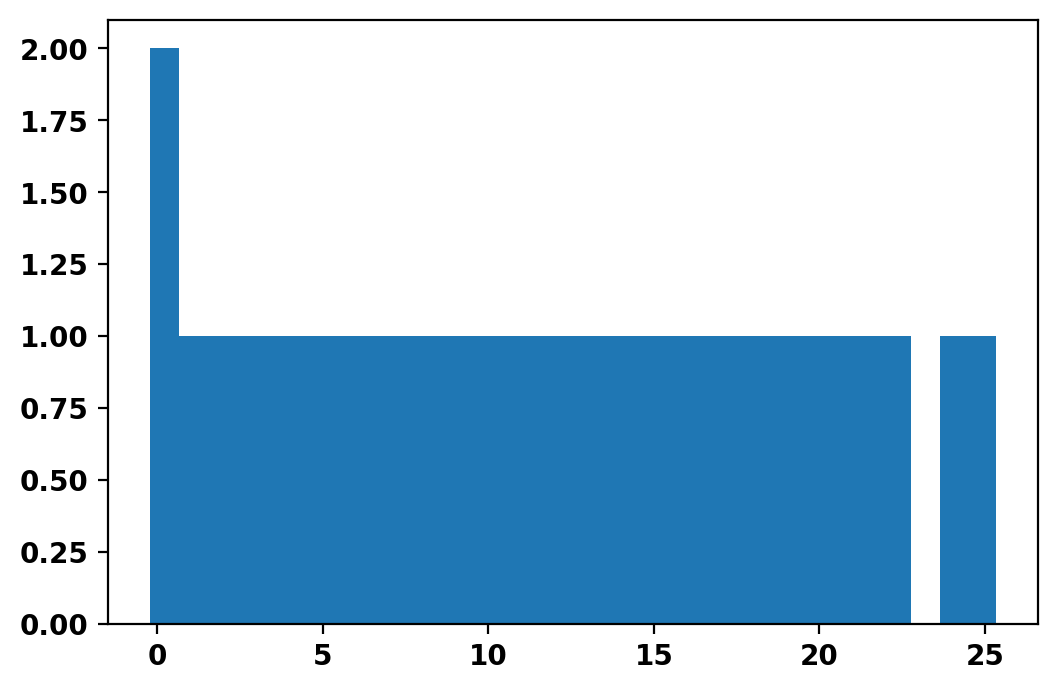

In [26]:
plt.hist(d_vals, bins = 30)

In [10]:
df2_['Column 9999']= df2_['9999.0'].apply(lambda x: 1 if x ==1 else 0)

In [11]:
df2_['Column 23384']=df2_['23384'].apply(lambda x: 1 if x==1 else 0)

In [12]:
# Var1={0,300,20} Var5 = {0,35,6}

In [13]:
Var1={0,300,20}, 

In [14]:
df2_['0 to 5 Var5'] =  df2_['Var5'].apply( lambda x: 1 if x <5 and x>= 0 else 0)
df2_['6 to 11 Var5'] =  df2_['Var5'].apply( lambda x: 1 if x <11 and x>= 6 else 0)
print(df2_.columns)
df2_['12 to 17 Var5'] =  df2_['Var5'].apply( lambda x: 1 if x <17 and x>= 12 else 0)
df2_['18 to 23 Var5'] =  df2_['Var5'].apply( lambda x: 1 if x <23 and x>=17 else 0)
df2_['24 to 29 Var5'] =  df2_['Var5'].apply( lambda x: 1 if x <29 and x>=23 else 0)
df2_['30 to 35 Var5'] =  df2_['Var5'].apply( lambda x: 1 if x <35 and x>=30 else 0)

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'y_target', 'Third', '1036',
       '1216', '1217', '1352', '1704', '1729', '2517', '2662', '23384', '2100',
       '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0',
       '12.0', '13.0', '14.0', '9999.0', 'Column 9999', 'Column 23384',
       '0 to 5 Var5', '6 to 11 Var5'],
      dtype='object')


In [15]:
print(np.arange(0,320,20))

[  0  20  40  60  80 100 120 140 160 180 200 220 240 260 280 300]


In [16]:
df2_['0 to 9 Var1'] =  df2_['Var1'].apply( lambda x: 1 if x <9 and x>= 0 else 0)
df2_['10 to 19 Var1'] =  df2_['Var1'].apply( lambda x: 1 if x <19 and x>= 10 else 0)
df2_['20 to 39 Var1'] =  df2_['Var1'].apply( lambda x: 1 if x <39 and x>= 20 else 0)
df2_['40 to 59 Var1'] =  df2_['Var1'].apply( lambda x: 1 if x <59 and x>= 40 else 0)
df2_['60 to 79 Var1'] =  df2_['Var1'].apply( lambda x: 1 if x <79 and x>=60 else 0)
df2_['80 to 99 Var1'] =  df2_['Var1'].apply( lambda x: 1 if x <99 and x>=80 else 0)
df2_['100 to 119 Var1'] =  df2_['Var1'].apply( lambda x: 1 if x <119 and x>=100 else 0)
df2_['120 to 139 Var1'] =  df2_['Var1'].apply( lambda x: 1 if x <139 and x>= 120 else 0)
df2_['140 to 159 Var1'] =  df2_['Var1'].apply( lambda x: 1 if x <159 and x>= 140 else 0)
print(df2_.columns)
df2_['160 to 179 Var1'] =  df2_['Var1'].apply( lambda x: 1 if x <179 and x>= 160 else 0)
df2_['180 to 199 Var1'] =  df2_['Var1'].apply( lambda x: 1 if x <199 and x>=180 else 0)
df2_['200 to 219 Var1'] =  df2_['Var1'].apply( lambda x: 1 if x <219 and x>=200 else 0)
df2_['220 to 239 Var1'] =  df2_['Var1'].apply( lambda x: 1 if x <239 and x>=220 else 0)
df2_['240 to 259 Var1'] =  df2_['Var1'].apply( lambda x: 1 if x <259 and x>= 240 else 0)
df2_['260 to 279 Var1'] =  df2_['Var1'].apply( lambda x: 1 if x <279 and x>=260else 0)
df2_['280 to 299 Var1'] =  df2_['Var1'].apply( lambda x: 1 if x <299 and x>= 280 else 0)


Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'y_target', 'Third', '1036',
       '1216', '1217', '1352', '1704', '1729', '2517', '2662', '23384', '2100',
       '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0',
       '12.0', '13.0', '14.0', '9999.0', 'Column 9999', 'Column 23384',
       '0 to 5 Var5', '6 to 11 Var5', '12 to 17 Var5', '18 to 23 Var5',
       '24 to 29 Var5', '30 to 35 Var5', '0 to 9 Var1', '10 to 19 Var1',
       '20 to 39 Var1', '40 to 59 Var1', '60 to 79 Var1', '80 to 99 Var1',
       '100 to 119 Var1', '120 to 139 Var1', '140 to 159 Var1'],
      dtype='object')


In [17]:
df2_.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'y_target', 'Third', '1036',
       '1216', '1217', '1352', '1704', '1729', '2517', '2662', '23384', '2100',
       '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0',
       '12.0', '13.0', '14.0', '9999.0', 'Column 9999', 'Column 23384',
       '0 to 5 Var5', '6 to 11 Var5', '12 to 17 Var5', '18 to 23 Var5',
       '24 to 29 Var5', '30 to 35 Var5', '0 to 9 Var1', '10 to 19 Var1',
       '20 to 39 Var1', '40 to 59 Var1', '60 to 79 Var1', '80 to 99 Var1',
       '100 to 119 Var1', '120 to 139 Var1', '140 to 159 Var1',
       '160 to 179 Var1', '180 to 199 Var1', '200 to 219 Var1',
       '220 to 239 Var1', '240 to 259 Var1', '260 to 279 Var1',
       '280 to 299 Var1'],
      dtype='object')

In [18]:
# '1036',
       '1216', '1217', '1352', '1704', '1729', '2517', '2662',
       '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0',
       '12.0', '13.0', '14.0', '6 to 11 Var5', '12 to 17 Var5', '18 to 23 Var5'

IndentationError: unexpected indent (<ipython-input-18-f5c32f38a999>, line 2)

In [22]:
#  '24 to 29 Var5', '30 to 35 Var5', 
lst=[ '0 to 9 Var1','0 to 5 Var5', '6 to 11 Var5', '12 to 17 Var5', '18 to 23 Var5',
       '24 to 29 Var5']
    #need number of y_target = 1 , y_target = 0 , count = sum(1)
def dfgh():
    nums = []
    for i in lst:
        get_0 = df2_.loc[(df2_['y_target'] == 0) & (df2_[i] == 1 ) ] 
        get_1 = df2_.loc[ (df2_['y_target'] == 1) & (df2_[i] == 1 ) ] 
        ap = (i,( len(get_0), len(get_1)) )
        nums.append(ap)
    return nums
shows = dfgh() 
print(shows)

[('0 to 9 Var1', (5018, 2655)), ('0 to 5 Var5', (3449, 1891)), ('6 to 11 Var5', (163, 139)), ('12 to 17 Var5', (34, 29)), ('18 to 23 Var5', (4, 18)), ('24 to 29 Var5', (0, 5))]


In [23]:
bars1 = [x[1][1] for x in shows ]  #counts of y_not == 1 for each grouping 
bars2 = [x[1][0] for x in shows ] 
 
print(len(bars1))

6


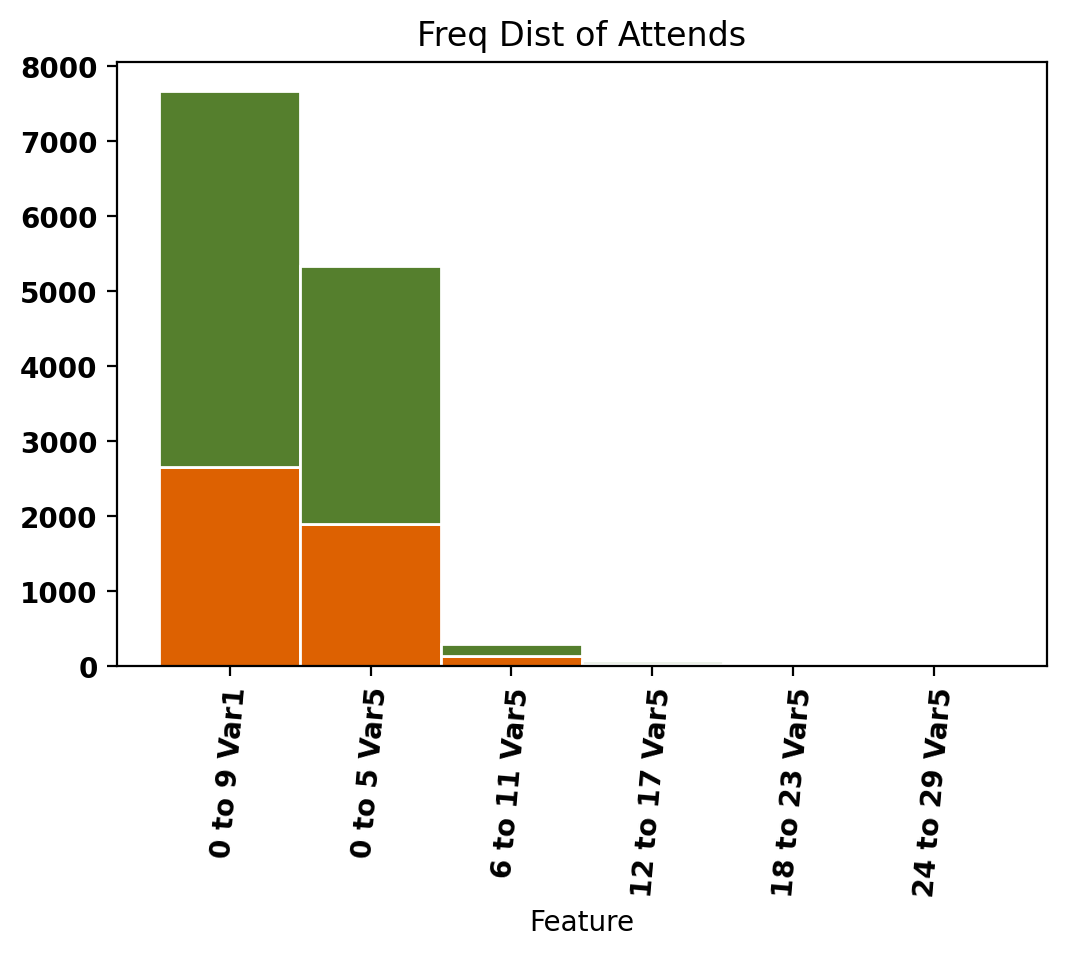

In [24]:
# for each time column make additional columns for below 

from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [x[1][1] for x in shows ]  #counts of y_not == 1 for each grouping 
bars2 = [x[1][0] for x in shows ] #counts of y_not == 0 for each grouping 
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
#,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
# The position of the bars on the x-axis
r = [1,2,3,4,5,6]  #len(number of grouppings)
 
# Names of group and bar width
names = [x[0] for x in shows] # The names for each group 
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color= '#dd6101', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.title(label = 'Freq Dist of Attends')
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Feature")
plt.xticks(rotation=85) 
# Show graphic
plt.show()

In [ ]:
# could do column 9999 column 22384 and two others in one plot . ANother set of o/1 plots for the range Var 1 
# maybe just put the biggest cols with 9999 and 22384,  ie 0 to 5 , 0 to 19, 0 to 19 Var1

In [ ]:
As the number of days 